<a href="https://colab.research.google.com/github/and1maestro/Exam_course2/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/House Price Prediction/housing.csv", low_memory=False)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.size

206400

In [ ]:
df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
df_num = df.drop(["ocean_proximity"], axis=1)

In [ ]:
cor_matrix = df_num.corr()
cor_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
cor = cor_matrix['median_house_value'].sort_values(ascending=False)
cor

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


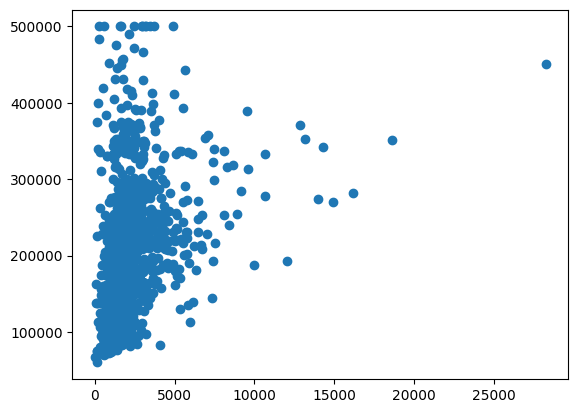

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["total_rooms"][:1000], df["median_house_value"][:1000])

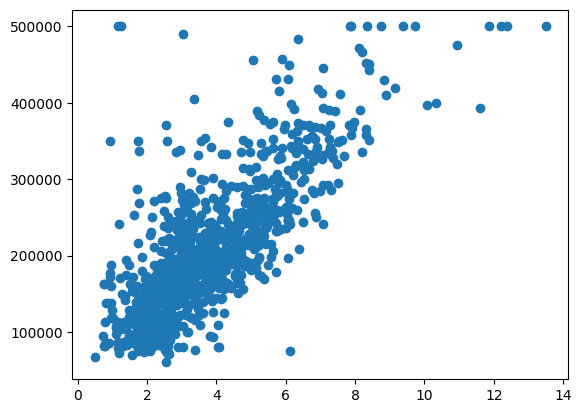

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df["median_income"][:1000], df["median_house_value"][:1000])

In [ ]:
df_tmp = df.copy()

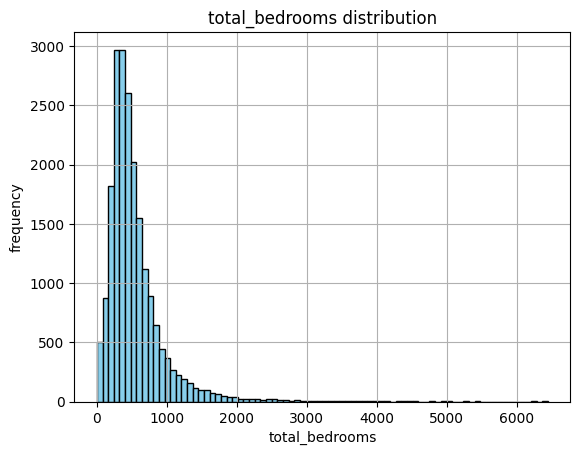

In [ ]:
df_tmp['total_bedrooms'].hist(bins=80, color='skyblue', edgecolor='black')
plt.title('total_bedrooms distribution')
plt.xlabel('total_bedrooms')
plt.ylabel('frequency')
plt.show()

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

total_bedrooms


In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label] = content.fillna(content.median())

In [ ]:
df_tmp.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [ ]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,category


In [ ]:
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes + 1

In [ ]:
pd.Categorical(df_tmp["ocean_proximity"])

[4, 4, 4, 4, 4, ..., 2, 2, 2, 2, 2]
Length: 20640
Categories (5, int8): [1, 2, 3, 4, 5]

In [ ]:

df_tmp.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,int8


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [ ]:
df_tmp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [ ]:
df_tmp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [ ]:
norm = df_tmp.copy()
columns = list(df_tmp.columns.values)
for column in columns:
  norm[column] = (df_tmp[column] - df_tmp[column].mean()) / df_tmp[column].std()

In [ ]:
norm

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327803,1.052523,0.982119,-0.804800,-0.972453,-0.974405,-0.977009,2.344709,2.129580,1.291058
1,-1.322812,1.043159,-0.607004,2.045841,1.357111,0.861418,1.669921,2.332181,1.314124,1.291058
2,-1.332794,1.038478,1.856137,-0.535733,-0.827004,-0.820757,-0.843616,1.782656,1.258663,1.291058
3,-1.337785,1.038478,1.856137,-0.624199,-0.719706,-0.766010,-0.733764,0.932945,1.165072,1.291058
4,-1.337785,1.038478,1.856137,-0.462393,-0.612408,-0.759828,-0.629142,-0.012881,1.172871,1.291058
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388274,-0.512579,-0.443438,-1.216099,-1.115777,-0.116736
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.922380,-0.944382,-1.008396,-0.691576,-1.124443,-0.116736
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.123605,-0.369528,-0.174037,-1.142566,-0.992722,-0.116736
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.304820,-0.604415,-0.393743,-1.054557,-1.058583,-0.116736


In [ ]:
X = norm.drop('median_house_value', axis=1)
y = norm['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf_reg = RandomForestRegressor().fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [ ]:
rf_mse = round(mean_squared_error(y_test, y_pred_rf), 3)
rf_mae = round(mean_absolute_error(y_test, y_pred_rf), 3)
rf_r2 = r2_score(y_test, y_pred_rf)

In [ ]:
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)

MSE: 0.175
MAE: 0.274
R2: 0.8269570972976497


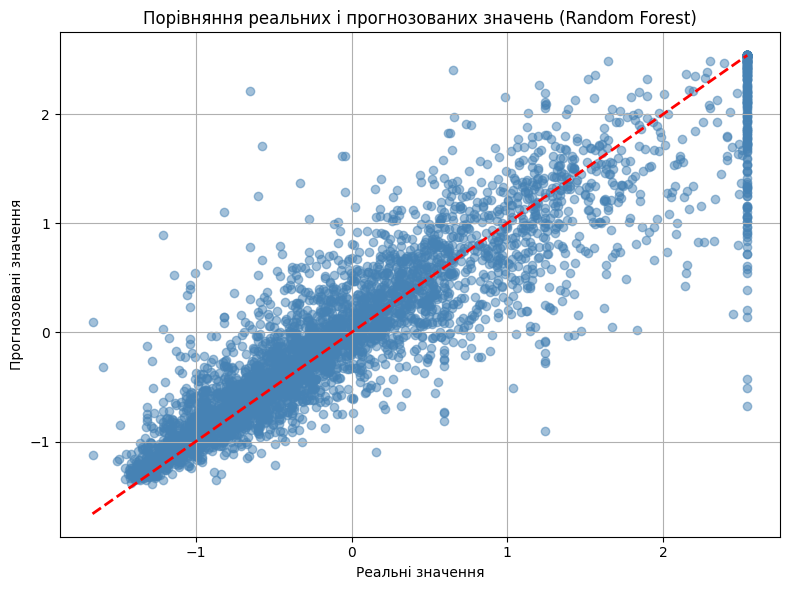

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Порівняння реальних і прогнозованих значень (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
gb_reg = GradientBoostingRegressor().fit(X_train, y_train)
y_pred_gr = gb_reg.predict(X_test)

In [ ]:
gb_mse = round(mean_squared_error(y_test, y_pred_gr), 3)
gb_mae = round(mean_absolute_error(y_test, y_pred_gr), 3)
gb_r2 = r2_score(y_test, y_pred_gr)

In [ ]:
print("MSE:", gb_mse)
print("MAE:", gb_mae)
print("R2:", gb_r2)

MSE: 0.224
MAE: 0.332
R2: 0.7786928727842786


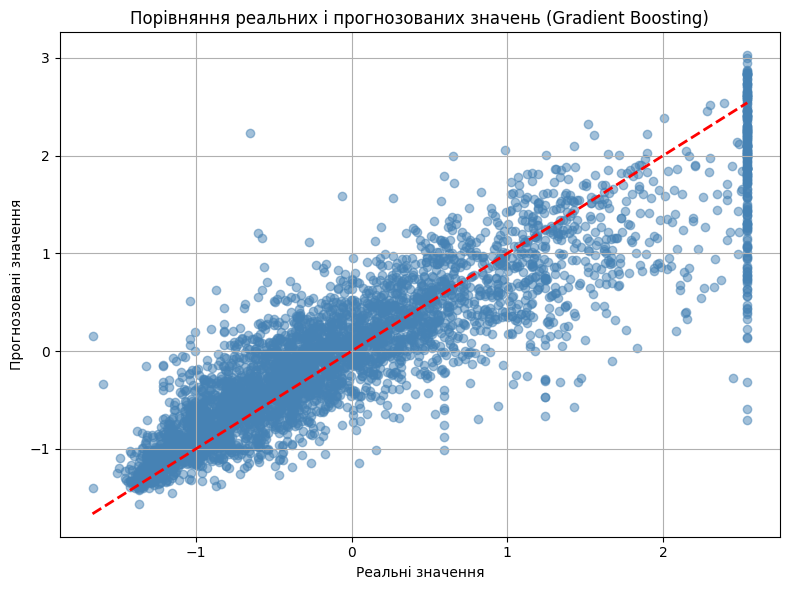

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gr, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Порівняння реальних і прогнозованих значень (Gradient Boosting)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
lr_reg = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)

In [ ]:
lr_mse = round(mean_squared_error(y_test, y_pred_lr), 3)
lr_mae = round(mean_absolute_error(y_test, y_pred_lr), 3)
lr_r2 = r2_score(y_test, y_pred_lr)

In [ ]:
print("MSE:", lr_mse)
print("MAE:", lr_mae)
print("R2:", lr_r2)

MSE: 0.358
MAE: 0.439
R2: 0.6465353883376872


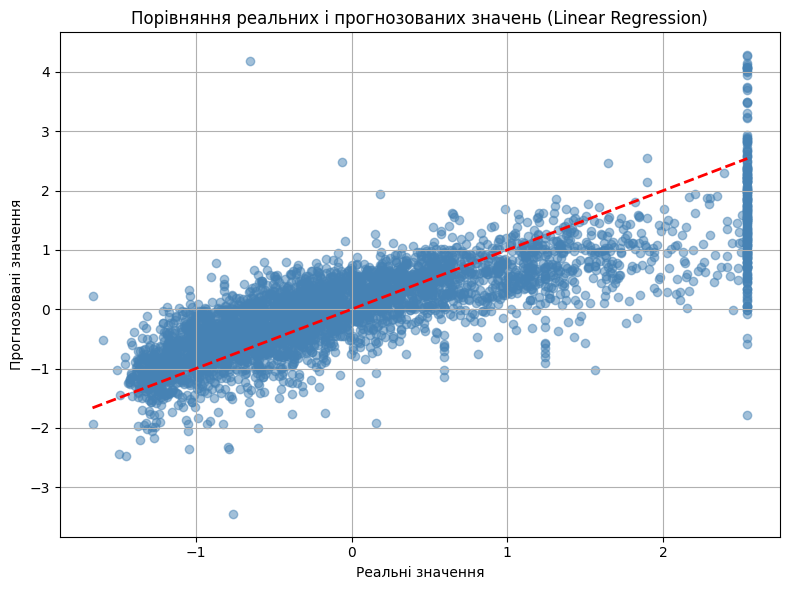

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Порівняння реальних і прогнозованих значень (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ridge = Ridge().fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
ridge_mse = round(mean_squared_error(y_test, y_pred_ridge), 3)
ridge_mae = round(mean_absolute_error(y_test, y_pred_ridge), 3)
ridge_r2 = r2_score(y_test, y_pred_ridge)

In [ ]:
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R2:", ridge_r2)

MSE: 0.358
MAE: 0.439
R2: 0.6465413766781356


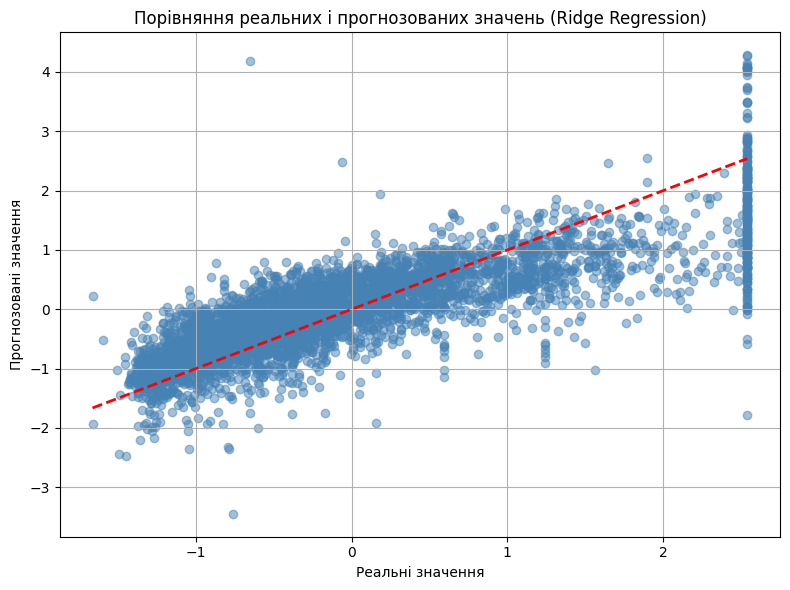

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Реальні значення")
plt.ylabel("Прогнозовані значення")
plt.title("Порівняння реальних і прогнозованих значень (Ridge Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import TargetEncoder, StandardScaler, LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = norm.drop('median_house_value', axis=1).values
y = norm['median_house_value'].values.reshape(-1, 1)

# Torch тензори
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
class RegressionNN(nn.Module):
    def __init__(self, input_dim):
        super(RegressionNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = RegressionNN(X.shape[1])

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 1.0440
Epoch 20, Loss: 0.7757
Epoch 40, Loss: 0.4751
Epoch 60, Loss: 0.3828
Epoch 80, Loss: 0.3422
Epoch 100, Loss: 0.3178
Epoch 120, Loss: 0.3008
Epoch 140, Loss: 0.2883
Epoch 160, Loss: 0.2786
Epoch 180, Loss: 0.2709


In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test).numpy()

    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R2: {r2}")

MSE: 0.25646770000457764
MAE: 0.35744550824165344
R2: 0.7394813299179077


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
np.arange(10, 100, 10)

array([10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
rf_params_grid = {"max_features": ['auto', 'sqrt', 'log2', 0.5, 0.7, 1.0],
                "max_depth": [None, 10, 20, 30],
                "n_estimators": [90, 100, 110],
                "min_samples_split": np.arange(2, 16, 2)}
rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                                                   param_distributions = rf_params_grid,
                                                   n_iter=20,
                                                   cv=5,
                                                   verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.5, 0.7, 1.0],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': [90, 100, 110]},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': np.int64(2),
 'max_features': 0.7,
 'max_depth': 20}

In [ ]:
rs_rf = RandomForestRegressor(max_depth=20,
                                 max_features=0.5,
                                 min_samples_split=4,
                                 n_estimators=90)
rs_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=0.5, min_samples_split=4,
                      n_estimators=90)

In [ ]:
y_pred_rs = rs_rf.predict(X_test)

rs_mse = mean_squared_error(y_test, y_pred_rs)
rs_mae = mean_absolute_error(y_test, y_pred_rs)
rs_r2 = r2_score(y_test, y_pred_rs)

print("MSE:", rs_mse)
print("MAE:", rs_mae)
print("R2:", rs_r2)

MSE: 0.17387654295718313
MAE: 0.2733782512850299
R2: 0.8233769957474291


In [ ]:
rs_gb = GradientBoostingRegressor(max_depth=3,
                                 learning_rate=0.8,
                                 min_samples_split=6,
                                 n_estimators=110).fit(X_train, y_train)

In [ ]:
y_pred_gb = rs_gb.predict(X_test)

gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("MSE:", gb_mse)
print("MAE:", gbmae)
print("R2:", gb_r2)

MSE: 0.2071430579880724
MAE: 0.30854128021849236
R2: 0.789585020557217


In [ ]:
ideal_rf = RandomForestRegressor(max_depth=20,
                                 max_features=0.5,
                                 min_samples_split=4,
                                 n_estimators=90)
ideal_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features=0.5, min_samples_split=4,
                      n_estimators=90)

In [ ]:
ideal_rf.feature_importances_

array([0.14162949, 0.12938042, 0.05037788, 0.03579738, 0.02752998,
       0.04030221, 0.02652901, 0.43502123, 0.11343241])

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances}).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature improtance")
    ax.invert_yaxis()

In [ ]:
X = df_tmp.drop('median_house_value', axis=1)
y = df_tmp['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

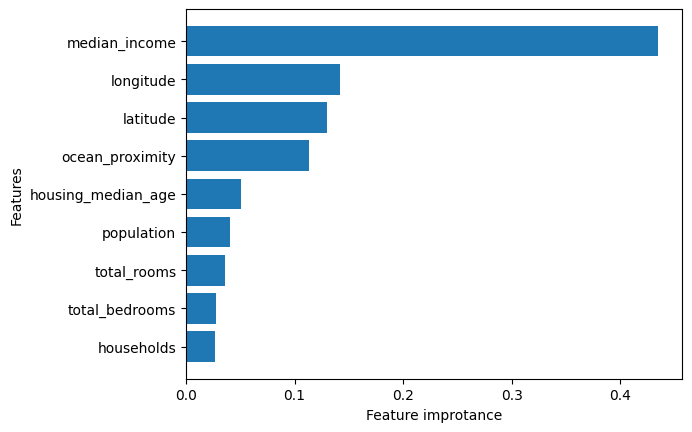

In [ ]:
plot_features(X_train.columns, ideal_rf.feature_importances_)

In [ ]:
gb_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
np.arange(0.2, 1.1, 0.2)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [ ]:
gb_params_grid = {"learning_rate": [0.8, 0.9, 1.0],
                  "max_depth": [3, 4, 5],
                  "n_estimators": [90, 100, 110],
                  "min_samples_split": np.arange(2, 20, 2)}
rs_gb_reg = RandomizedSearchCV(GradientBoostingRegressor(),
                                                   param_distributions=gb_params_grid,
                                                   n_iter=20,
                                                   cv=5,
                                                   verbose=True)
rs_gb_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=20,
                   param_distributions={'learning_rate': [0.8, 0.9, 1.0],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [90, 100, 110]},
                   verbose=True)

In [ ]:
rs_gb_reg.best_params_

{'n_estimators': 110,
 'min_samples_split': np.int64(6),
 'max_depth': 3,
 'learning_rate': 0.8}

In [ ]:
y_pred_rs_gb_reg = rs_gb_reg.predict(X_test)

rs_gb_reg_mse = mean_squared_error(y_test, y_pred_rs_gb_reg)
rs_gb_reg_mae = mean_absolute_error(y_test, y_pred_rs_gb_reg)
rs_gb_reg_r2 = r2_score(y_test, y_pred_rs_gb_reg)

print("MSE:", rs_gb_reg_mse)
print("MAE:", rs_gb_reg_mae)
print("R2:", rs_gb_reg_r2)

NameError: name 'rs_gb_reg' is not defined

In [ ]:
y_pred_ideal_rf = ideal_rf.predict(X_test)

ideal_rf_mse = mean_squared_error(y_test, y_pred_ideal_rf)
ideal_rf_mae = mean_absolute_error(y_test, y_pred_ideal_rf)
ideal_rf_r2 = r2_score(y_test, y_pred_ideal_rf)

print("MSE:", ideal_rf_mse)
print("MAE:", ideal_rf_mae)
print("R2:", ideal_rf_r2)

MSE: 2341487308.6169357
MAE: 32106.7830322535
R2: 0.8295383843939361


In [ ]:
X = df_tmp.drop('median_house_value', axis=1)
y = df_tmp['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_test[:2]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_bedrooms_is_missing
16616,-120.85,35.38,27.0,3493.0,909.0,1481.0,666.0,2.3075,5,False
10431,-117.62,33.43,27.0,1835.0,413.0,1221.0,377.0,3.2232,5,False


In [ ]:
X_test

In [ ]:
 y_test[:5]

,median_house_value
16616,184200.0
10431,247100.0
19788,88800.0
20368,176000.0
15912,240900.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test.iloc[199])

longitude                   -119.83
latitude                       36.8
housing_median_age             24.0
total_rooms                  3756.0
total_bedrooms                681.0
population                   1586.0
households                    739.0
median_income                3.8571
ocean_proximity                   2
total_bedrooms_is_missing     False
Name: 2252, dtype: object


In [ ]:
print(y_pred_ideal_rf[199])

102039.25925925927


In [ ]:
print(y_test.iloc[199])

90100.0


In [ ]:
y_pred_ideal_rf = ideal_rf.predict(X_test_scaled)

ideal_rf_mse = mean_squared_error(y_test, y_pred_ideal_rf)
ideal_rf_mae = mean_absolute_error(y_test, y_pred_ideal_rf)
ideal_rf_r2 = r2_score(y_test, y_pred_ideal_rf)

print("MSE:", ideal_rf_mse)
print("MAE:", ideal_rf_mae)
print("R2:", ideal_rf_r2)

MSE: 2350590334.5151286
MAE: 32062.58900613064
R2: 0.817286472134962


In [ ]:
y_pred_ideal_rf[1]

np.float64(76005.98183785558)

In [ ]:
ideal_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 20,
 'max_features': 0.5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 90,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data = {'longitude': [-119], 'latitude': [35.31], 'housing_median_age': [50], 'total_rooms': [75], 'total_bedrooms': [31], 'population': [43], 'households': [15], 'median_income': [2.337], 'median_house_value': [118900], 'ocean_proximity': ["INLAND"], }

In [ ]:
df_real = pd.DataFrame(data)
df_real

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119,35.31,50,75,31,43,15,2.337,118900,INLAND


In [ ]:
df_real["total_bedrooms_is_missing"] = False

In [ ]:
df_real

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_is_missing
0,-119,35.31,50,75,31,43,15,2.337,118900,INLAND,False


In [ ]:
X_real = df_real.drop('median_house_value', axis=1)
y_real = df_real['median_house_value']

In [ ]:
X_real

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_bedrooms_is_missing
0,-119,35.31,50,75,31,43,15,2.232,2,False


In [ ]:
y_real

,median_house_value
0,118900


In [ ]:
df['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


In [ ]:
df_tmp["ocean_proximity"]

,ocean_proximity
0,4
1,4
2,4
3,4
4,4
...,...
20635,2
20636,2
20637,2
20638,2


In [ ]:
df_real["ocean_proximity"] = 2
df_real

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_is_missing
0,-119,35.31,50,75,31,43,15,2.337,118900,2,False


In [ ]:
X_real = df_real.drop('median_house_value', axis=1)
y_real = df_real['median_house_value']

X_real_scaled = scaler.transform(X_real)

In [ ]:
X_real_scaled

array([[ 0.28032224, -0.14870724,  1.69537756, -1.17076331, -1.20602171,
        -1.21254974, -1.26712695, -0.80770443, -0.11607902, -0.10138541]])

In [ ]:
y_pred_real = ideal_rf.predict(X_real_scaled)

real_mse = mean_squared_error(y_real, y_pred_real)
real_mae = mean_absolute_error(y_real, y_pred_real)
real_r2 = r2_score(y_real, y_pred_real)

print("MSE:", real_mse)
print("MAE:", real_mae)
print("R2:", real_r2)

MSE: 125762.17421123147
MAE: 354.6296296296059
R2: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print(y_pred_real)

[118545.37037037]


In [ ]:
y_real

,median_house_value
0,118900


In [ ]:
X = df_tmp.drop('median_house_value', axis=1)
y = df_tmp['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [ ]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_bedrooms_is_missing
17758,-121.80,37.35,17.0,2529.0,423.0,1756.0,429.0,5.1017,1,False
10223,-117.89,33.88,27.0,2091.0,336.0,1037.0,332.0,5.7519,1,False
17443,-120.47,34.66,4.0,3376.0,525.0,1684.0,535.0,4.9237,5,False
12965,-121.32,38.70,17.0,3214.0,551.0,1879.0,562.0,4.3643,2,False
20149,-119.12,34.38,28.0,7200.0,1281.0,3793.0,1238.0,4.0750,1,False


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ideal_rf = RandomForestRegressor(max_depth=20,
                                 max_features=0.5,
                                 min_samples_split=4,
                                 n_estimators=90)
ideal_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, max_features=0.5, min_samples_split=4,
                      n_estimators=90)

In [ ]:
data1 = {'longitude': [-119], 'latitude': [35.31], 'housing_median_age': [50], 'total_rooms': [75], 'total_bedrooms': [31], 'population': [43], 'households': [15], 'median_income': [2.337], 'median_house_value': [118900], 'ocean_proximity': [2], 'total_bedrooms_is_missing': False  }

In [ ]:
df_real1 = pd.DataFrame(data1)
df_real1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_is_missing
0,-119,35.31,50,75,31,43,15,2.337,118900,2,False


In [ ]:
X_real1 = df_real1.drop('median_house_value', axis=1)
y_real1 = df_real1['median_house_value']

X_real_scaled1 = scaler.transform(X_real1)

In [ ]:
y_pred_real1 = ideal_rf.predict(X_real_scaled1)

real_mse = mean_squared_error(y_real1, y_pred_real1)
real_mae = mean_absolute_error(y_real1, y_pred_real1)
real_r2 = r2_score(y_real1, y_pred_real1)

print("MSE:", real_mse)
print("MAE:", round(real_mae, 2))
print("R2:", real_r2)

MSE: 103787130.15488842
MAE: 10187.6
R2: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
data2 = {'longitude': [-121], 'latitude': [37.62], 'housing_median_age': [70], 'total_rooms': [118], 'total_bedrooms': [64], 'population': [67], 'households': [15], 'median_income': [1.933], 'median_house_value': [166050], 'ocean_proximity': [2], 'total_bedrooms_is_missing': False }

In [ ]:
df_real2 = pd.DataFrame(data2)
df_real2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_is_missing
0,-121,37.62,70,118,64,67,15,1.933,166050,2,False


In [ ]:
X_real2 = df_real2.drop('median_house_value', axis=1)
y_real2 = df_real2['median_house_value']

X_real_scaled2 = scaler.transform(X_real2)

In [ ]:
X_real_scaled2

array([[-0.71905416,  0.93542244,  3.27165432, -1.13066076, -1.10453334,
        -1.17177669, -1.24145328, -1.01892758, -0.11505337, -0.10138541]])

In [ ]:
y_pred_real2 = ideal_rf.predict(X_real_scaled2)

real_mse = mean_squared_error(y_real2, y_pred_real2)
real_mae = mean_absolute_error(y_real2, y_pred_real2)
real_r2 = r2_score(y_real2, y_pred_real2)

print("MSE:", real_mse)
print("MAE:", round(real_mae, 2))
print("R2:", real_r2)

MSE: 271716043.1770643
MAE: 16483.81
R2: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print(y_pred_real2)

[149566.18845118]


In [ ]:
y_real2

,median_house_value
0,166050


In [ ]:
data3 = {'longitude': [-122.4], 'latitude': [40.59], 'housing_median_age': [80], 'total_rooms': [113], 'total_bedrooms': [51], 'population': [59], 'households': [12], 'median_income': [2.699], 'median_house_value': [188190], 'ocean_proximity': [2], 'total_bedrooms_is_missing': False }

In [ ]:
df_real3 = pd.DataFrame(data3)
df_real3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedrooms_is_missing
0,-122.4,40.59,80,113,51,59,12,2.699,188190,2,False


In [ ]:
X_real3 = df_real3.drop('median_house_value', axis=1)
y_real3 = df_real3['median_house_value']

X_real_scaled3 = scaler.transform(X_real3)
X_real_scaled3

array([[-1.41853084,  2.32742435,  4.06340517, -1.13291   , -1.13497852,
        -1.17868048, -1.24915486, -0.61759195, -0.11505337, -0.10138541]])

In [ ]:
y_pred_real3 = ideal_rf.predict(X_real_scaled3)

real_mse = mean_squared_error(y_real3, y_pred_real3)
real_mae = mean_absolute_error(y_real3, y_pred_real3)
real_r2 = r2_score(y_real3, y_pred_real3)

print("MSE:", real_mse)
print("MAE:", real_mae)
print("R2:", real_r2)

MSE: 8269377694.516959
MAE: 90936.11875661375
R2: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [ ]:
print(y_pred_real3)

[97253.88124339]


In [ ]:
y_real3

,median_house_value
0,188190


In [ ]:
X = df_tmp.drop('median_house_value', axis=1)
y = df_tmp['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=891)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rf_params_grid = {"max_features": ['auto', 'sqrt', 'log2', 0.5, 0.7, 1.0],
                "max_depth": [None, 10, 20, 30],
                "n_estimators": [90, 100, 110],
                "min_samples_split": np.arange(2, 16, 2)}
rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                                                   param_distributions = rf_params_grid,
                                                   n_iter=20,
                                                   cv=5,
                                                   verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.5, 0.7, 1.0],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14]),
                                        'n_estimators': [90, 100, 110]},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': np.int64(4),
 'max_features': 0.5,
 'max_depth': 20}

In [ ]:
# ideal_rf = RandomForestRegressor(max_depth=20,
#                                  max_features=0.5,
#                                  min_samples_split=4,
#                                  n_estimators=110)
ideal_rf = RandomForestRegressor(max_depth=20,
                                 max_features=0.5,
                                 min_samples_split=4,
                                 n_estimators=90,
                                 random_state=891)

In [ ]:
ideal_rf.fit(X_train_scaled, y_train)
y_pred_real2 = ideal_rf.predict(X_test_scaled)
real_mae = mean_absolute_error(y_test, y_pred_real2)
real_r2 = r2_score(y_test, y_pred_real2)

print("MAE:", real_mae)
print("R2:", real_r2)

MAE: 31873.704888338652
R2: 0.8215438701903623


In [ ]:
for i in range(100, 200):
  X = df_tmp.drop('median_house_value', axis=1)
  y = df_tmp['median_house_value']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  ideal_rf.fit(X_train_scaled, y_train)
  y_pred_real2 = ideal_rf.predict(X_real_scaled2)
  real_mae = mean_absolute_error(y_real2, y_pred_real2)

  print(f"MAE for random_state={i}:", round(real_mae, 2))

MAE for random_state=100: 32278.0
MAE for random_state=101: 55316.71
MAE for random_state=102: 57603.77
MAE for random_state=103: 22260.95
MAE for random_state=104: 56926.05
MAE for random_state=105: 42471.49
MAE for random_state=106: 62317.62
MAE for random_state=107: 59035.5
MAE for random_state=108: 32730.95
MAE for random_state=109: 40774.62
MAE for random_state=110: 46203.34
MAE for random_state=111: 47034.95
MAE for random_state=112: 51729.01
MAE for random_state=113: 64884.97
MAE for random_state=114: 37790.73
MAE for random_state=115: 58689.12
MAE for random_state=116: 72882.91
MAE for random_state=117: 62913.28
MAE for random_state=118: 64034.45
MAE for random_state=119: 65511.94
MAE for random_state=120: 49573.12
MAE for random_state=121: 48054.28
MAE for random_state=122: 50885.38
MAE for random_state=123: 39996.19
MAE for random_state=124: 53542.88
MAE for random_state=125: 51804.33
MAE for random_state=126: 52407.36
MAE for random_state=127: 22322.51
MAE for random_state=1

In [ ]:
maes = []

for i in range(400, 2000):
  X = df_tmp.drop('median_house_value', axis=1)
  y = df_tmp['median_house_value']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  ideal_rf = RandomForestRegressor(max_depth=20,
                                 max_features=0.5,
                                 min_samples_split=4,
                                 n_estimators=90,
                                 random_state=i)
  ideal_rf.fit(X_train_scaled, y_train)
  y_pred_real2 = ideal_rf.predict(X_real_scaled2)
  real_mae = mean_absolute_error(y_real2, y_pred_real2)
  maes.append(real_mae)

  print(f"MAE for random_state={i}:", round(real_mae, 2))

print(min(maes))

MAE for random_state=400: 44161.7
MAE for random_state=401: 61951.55
MAE for random_state=402: 43625.05
MAE for random_state=403: 61013.53
MAE for random_state=404: 62135.49
MAE for random_state=405: 49353.59
MAE for random_state=406: 62184.34
MAE for random_state=407: 50331.17
MAE for random_state=408: 29252.88
MAE for random_state=409: 66127.95
MAE for random_state=410: 67159.22
MAE for random_state=411: 59550.05
MAE for random_state=412: 49728.11
MAE for random_state=413: 50224.22
MAE for random_state=414: 50511.86
MAE for random_state=415: 73857.22
MAE for random_state=416: 58519.21
MAE for random_state=417: 60265.15
MAE for random_state=418: 70879.87
MAE for random_state=419: 46825.14
MAE for random_state=420: 53892.21
MAE for random_state=421: 53212.57
MAE for random_state=422: 54648.86
MAE for random_state=423: 51424.44
MAE for random_state=424: 59000.37
MAE for random_state=425: 48005.62
MAE for random_state=426: 75424.6
MAE for random_state=427: 41572.05
MAE for random_state=4